<a href="https://colab.research.google.com/github/yongjuncho123/dust/blob/main/job03_2_LSTM_%EB%AA%A8%EB%8D%B8%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/project02_dust/최종 데이터/Real_total/real_total_GD.csv')

df

,일시,구분,미세먼지(PM10),초미세먼지(PM25),기온(°C),강수량(mm),풍향(16방위),풍향범주_corr,풍향범주,SO2,CO,O3,NO2,측정장소
0,2016-01-01 00:00:00,강동구,87.0,51.0,-1.9,0.0,0.0,1.0,북,0.004,1.2,0.002,0.050,서울 강동구 구천면로 42길 59
1,2016-01-01 01:00:00,강동구,82.0,44.0,-2.1,0.0,90.0,3.0,동,0.004,1.2,0.002,0.048,서울 강동구 구천면로 42길 59
2,2016-01-01 02:00:00,강동구,97.0,58.0,-2.2,0.0,0.0,1.0,북,0.004,1.1,0.002,0.044,서울 강동구 구천면로 42길 59
3,2016-01-01 03:00:00,강동구,88.0,53.0,-2.5,0.0,90.0,3.0,동,0.004,1.0,0.002,0.041,서울 강동구 구천면로 42길 59
4,2016-01-01 04:00:00,강동구,90.0,52.0,-2.9,0.0,70.0,2.0,북동,0.004,1.0,0.002,0.039,서울 강동구 구천면로 42길 59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35056,2019-12-31 19:00:00,강동구,24.0,18.0,-6.9,0.0,290.0,8.0,북서,0.003,0.5,0.013,0.028,서울 강동구 구천면로 42길 59
35057,2019-12-31 20:00:00,강동구,23.0,17.0,-7.0,0.0,290.0,8.0,북서,0.003,0.4,0.015,0.025,서울 강동구 구천면로 42길 59
35058,2019-12-31 21:00:00,강동구,25.0,19.0,-7.4,0.0,20.0,2.0,북동,0.003,0.4,0.015,0.023,서울 강동구 구천면로 42길 59
35059,2019-12-31 22:00:00,강동구,24.0,17.0,-8.2,0.0,0.0,1.0,북,0.003,0.5,0.004,0.040,서울 강동구 구천면로 42길 59


In [ ]:
df['일시'] = pd.to_datetime(df['일시'])

df['year'] = df['일시'].dt.year

df

,일시,구분,미세먼지(PM10),초미세먼지(PM25),기온(°C),강수량(mm),풍향(16방위),풍향범주_corr,풍향범주,SO2,CO,O3,NO2,측정장소,year
0,2016-01-01 00:00:00,강동구,87.0,51.0,-1.9,0.0,0.0,1.0,북,0.004,1.2,0.002,0.050,서울 강동구 구천면로 42길 59,2016
1,2016-01-01 01:00:00,강동구,82.0,44.0,-2.1,0.0,90.0,3.0,동,0.004,1.2,0.002,0.048,서울 강동구 구천면로 42길 59,2016
2,2016-01-01 02:00:00,강동구,97.0,58.0,-2.2,0.0,0.0,1.0,북,0.004,1.1,0.002,0.044,서울 강동구 구천면로 42길 59,2016
3,2016-01-01 03:00:00,강동구,88.0,53.0,-2.5,0.0,90.0,3.0,동,0.004,1.0,0.002,0.041,서울 강동구 구천면로 42길 59,2016
4,2016-01-01 04:00:00,강동구,90.0,52.0,-2.9,0.0,70.0,2.0,북동,0.004,1.0,0.002,0.039,서울 강동구 구천면로 42길 59,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35056,2019-12-31 19:00:00,강동구,24.0,18.0,-6.9,0.0,290.0,8.0,북서,0.003,0.5,0.013,0.028,서울 강동구 구천면로 42길 59,2019
35057,2019-12-31 20:00:00,강동구,23.0,17.0,-7.0,0.0,290.0,8.0,북서,0.003,0.4,0.015,0.025,서울 강동구 구천면로 42길 59,2019
35058,2019-12-31 21:00:00,강동구,25.0,19.0,-7.4,0.0,20.0,2.0,북동,0.003,0.4,0.015,0.023,서울 강동구 구천면로 42길 59,2019
35059,2019-12-31 22:00:00,강동구,24.0,17.0,-8.2,0.0,0.0,1.0,북,0.003,0.5,0.004,0.040,서울 강동구 구천면로 42길 59,2019


In [ ]:
data = df[['일시', '미세먼지(PM10)', '초미세먼지(PM25)']]
data = data.rename(columns = {'일시' : 'time', '미세먼지(PM10)' : 'PM10', '초미세먼지(PM25)' : 'PM25'})
data

,time,PM10,PM25
0,2016-01-01 00:00:00,87.0,51.0
1,2016-01-01 01:00:00,82.0,44.0
2,2016-01-01 02:00:00,97.0,58.0
3,2016-01-01 03:00:00,88.0,53.0
4,2016-01-01 04:00:00,90.0,52.0
...,...,...,...
35056,2019-12-31 19:00:00,24.0,18.0
35057,2019-12-31 20:00:00,23.0,17.0
35058,2019-12-31 21:00:00,25.0,19.0
35059,2019-12-31 22:00:00,24.0,17.0


#### PM10 LSTM

In [ ]:
train_data = data['PM10'].values
train_data
taget_data = data['PM10'].values

train_data

array([87., 82., 97., ..., 25., 24., 25.])

In [ ]:
print(train_data)
print(train_data.reshape(-1, 1))

[87. 82. 97. ... 25. 24. 25.]
[[87.]
 [82.]
 [97.]
 ...
 [25.]
 [24.]
 [25.]]


In [ ]:
# 스케일링 할지 말지는 결과를 보고 결정하자
scaler = MinMaxScaler()

scaled_train = scaler.fit_transform(train_data.reshape(-1, 1))
# scaler는 기본적으로 이차원 배열을 받는데 얘는 단일 배열이라 reshape(-1, 1)의 형태로 바꿔줘야 한다
scaled_taget = scaler.fit_transform(taget_data.reshape(-1, 1))

scaled_train

array([[0.18315789],
       [0.17263158],
       [0.20421053],
       ...,
       [0.05263158],
       [0.05052632],
       [0.05263158]])

In [ ]:
# for i in range(len(train_data) - len_step):
# 만약 len(train_data)의 길이가 8372고 len_step이 5 라면 i가 0부터 8366까지 반복되며
# 이때 8367개의 시퀀스 덩어리가 만들어진다.

In [ ]:
def sequenceCut(data, len_step):
    sequence = [] # 한 덩어리의 시퀀스가 들어가는 리스트
    labels = [] # 한 덩어리의 시퀀스의 정답이 들어가는 리스트
    for i in range(len(data) - len_step):
        sequence.append(data[i : i + len_step]) # i가 0이라면 train_data[0 : 5]까지의 값이 시퀀스 덩어리로 묶인다
        labels.append(data[i + len_step])# i가 0이라면 train_data[6]의 값이 정답지로 들어간다.

    return np.array(sequence), np.array(labels) # array 배열로 바로 만들어 바로 lstm 모델에 들어갈 수 있게 함

In [ ]:
len_step = 5

X, y = sequenceCut(scaled_train, len_step)

In [ ]:
print(X)
print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
print(y)

[[[0.18315789]
  [0.17263158]
  [0.20421053]
  [0.18526316]
  [0.18947368]]

 [[0.17263158]
  [0.20421053]
  [0.18526316]
  [0.18947368]
  [0.16842105]]

 [[0.20421053]
  [0.18526316]
  [0.18947368]
  [0.16842105]
  [0.17263158]]

 ...

 [[0.05052632]
  [0.05684211]
  [0.05684211]
  [0.05052632]
  [0.04842105]]

 [[0.05684211]
  [0.05684211]
  [0.05052632]
  [0.04842105]
  [0.05263158]]

 [[0.05684211]
  [0.05052632]
  [0.04842105]
  [0.05263158]
  [0.05052632]]]
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
[[0.16842105]
 [0.17263158]
 [0.15157895]
 ...
 [0.05263158]
 [0.05052632]
 [0.05263158]]


In [ ]:
# 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28044, 5, 1)
(7012, 5, 1)
(28044, 1)
(7012, 1)


In [ ]:
# PM10 LSTM

model = Sequential()
model.add(LSTM(64, activation = 'tanh', return_sequences = True, input_shape = (len_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(y_train.shape[1]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/100
877/877 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0017 - val_loss: 4.1291e-04
Epoch 2/100
877/877 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 4.9148e-04 - val_loss: 4.5424e-04
Epoch 3/100
877/877 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 4.6292e-04 - val_loss: 4.3951e-04
Epoch 4/100
877/877 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 4.7980e-04 - val_loss: 3.8884e-04
Epoch 5/100
877/877 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 4.8896e-04 - val_loss: 4.2969e-04
Epoch 6/100
877/877 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 4.6927e-04 - val_loss: 4.6783e-04
Epoch 7/100
877/877 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 4.6621e-04 - val_loss: 4.0059e-04
Epoch 8/100
877/877 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 4.3056e-04 - val_loss: 3.9664e-04
Epoch 9/100
877/877 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 4.7691e-04 - val_loss: 3.9994e-04
Epoch 10/100
877/877 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 4.4789e-04 - val_loss: 4.0166e-04
Epoch 11/100
877/877 ━━━━━━━━━━━━━━━━━━━━ 6s 7

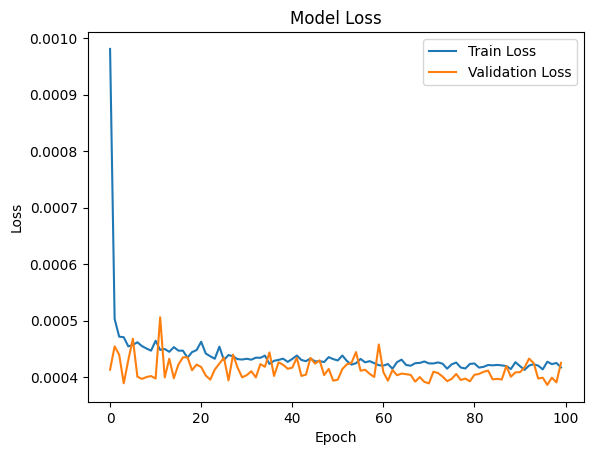

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4418e-04
Test Loss: 0.0004250191559549421
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


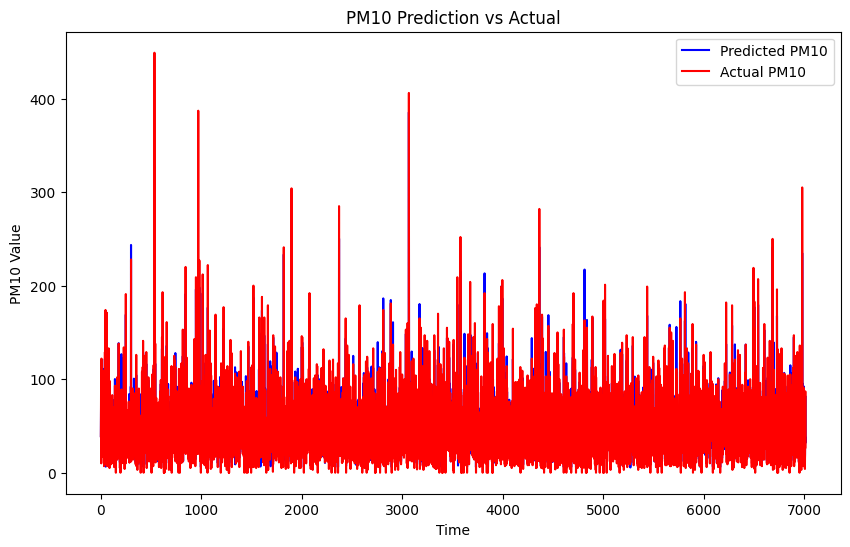

RMSE: 9.79259747505674


In [ ]:
# 모델 평가
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# 예측
predictions = model.predict(X_test)

# 스케일링 복원
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

# 예측 vs 실제 값 시각화
plt.figure(figsize=(10, 6))
plt.plot(predictions_rescaled, label='Predicted PM10', color='blue')
plt.plot(y_test_rescaled, label='Actual PM10', color='red')
plt.title('PM10 Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('PM10 Value')
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))
print(f'RMSE: {rmse}')

In [ ]:
model.save('/content/drive/MyDrive/data/project02_dust/LSTM 모델/240905_LSTM_PM10.h5', include_optimizer=True)

RMSE: 9.387325120716083


#### PM25 모델

In [ ]:
train_data_pm25 = data['PM25'].values

taget_data_pm25 = data['PM25'].values

train_data_pm25

array([51., 44., 58., ..., 19., 17., 18.])

In [ ]:
scaled_train_pm25 = scaler.fit_transform(train_data_pm25.reshape(-1, 1))
# scaler는 기본적으로 이차원 배열을 받는데 얘는 단일 배열이라 reshape(-1, 1)의 형태로 바꿔줘야 한다
scaled_taget_pm25 = scaler.fit_transform(taget_data_pm25.reshape(-1, 1))

scaled_train_pm25

array([[0.29824561],
       [0.25730994],
       [0.33918129],
       ...,
       [0.11111111],
       [0.0994152 ],
       [0.10526316]])

In [ ]:
len_step = 5

X, y = sequenceCut(scaled_train_pm25, len_step)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28044, 5, 1)
(7012, 5, 1)
(28044, 1)
(7012, 1)


In [ ]:
model = Sequential()
model.add(LSTM(64, activation = 'tanh', return_sequences = True, input_shape = (len_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(y_train.shape[1]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.0043 - val_loss: 0.0013
Epoch 2/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 3/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 4/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 6/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 7/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 8/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 9/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 10/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 11/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 12/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 7s 8

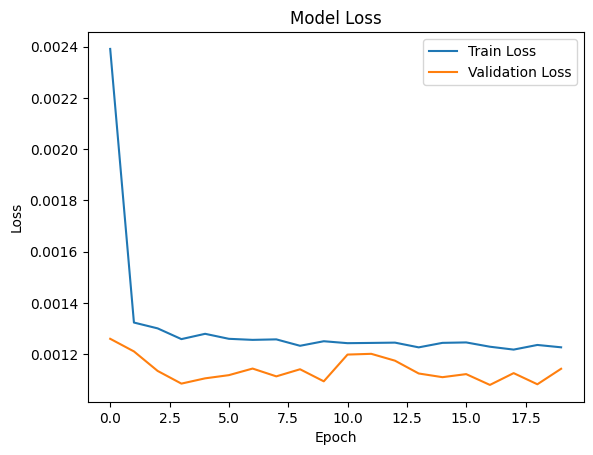

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0011
Test Loss: 0.0011436559725552797
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


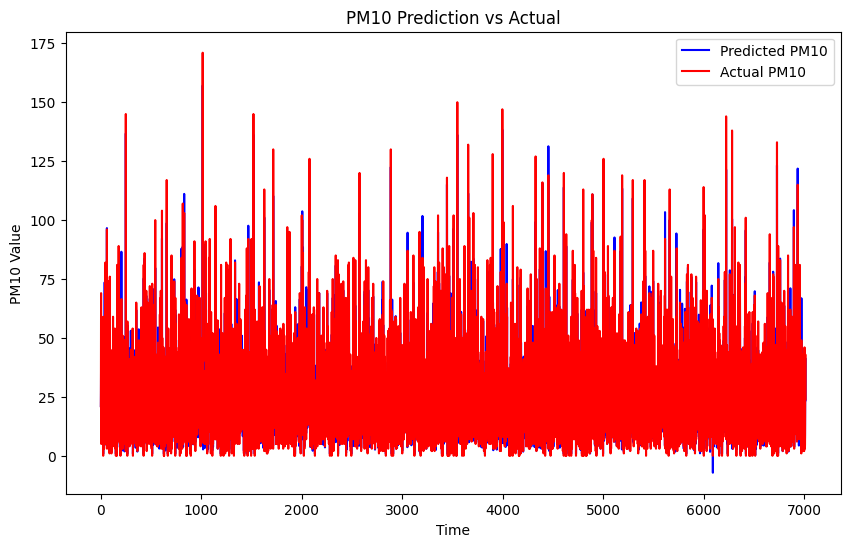

RMSE: 5.7828747277364885


In [ ]:
# 모델 평가
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# 예측
predictions = model.predict(X_test)

# 스케일링 복원
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

# 예측 vs 실제 값 시각화
plt.figure(figsize=(10, 6))
plt.plot(predictions_rescaled, label='Predicted PM10', color='blue')
plt.plot(y_test_rescaled, label='Actual PM10', color='red')
plt.title('PM10 Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('PM10 Value')
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))
print(f'RMSE: {rmse}')

In [ ]:
model.save('/content/drive/MyDrive/data/project02_dust/LSTM 모델/LSTM_PM25.h5', include_optimizer=True)

#### 스케일 X / RMSE: 5157.193973911098

In [ ]:
len_step = 5

X, y = sequenceCut(train_data, len_step)

print(X)

[[87. 82. 97. 88. 90.]
 [82. 97. 88. 90. 80.]
 [97. 88. 90. 80. 82.]
 ...
 [24. 27. 27. 24. 23.]
 [27. 27. 24. 23. 25.]
 [27. 24. 23. 25. 24.]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28044, 5)
(7012, 5)
(28044,)
(7012,)


In [ ]:
# PM10 LSTM

model = Sequential()
model.add(LSTM(64, activation = 'tanh', return_sequences = True, input_shape = (len_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(1)) # Change the number of units in the Dense layer to 1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 2045.3962 - val_loss: 1114.3967
Epoch 2/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 942.6256 - val_loss: 659.7534
Epoch 3/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 559.3766 - val_loss: 459.9153
Epoch 4/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 448.2979 - val_loss: 353.0901
Epoch 5/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 355.7302 - val_loss: 287.6088
Epoch 6/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 290.7353 - val_loss: 241.6469
Epoch 7/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 234.3632 - val_loss: 217.0338
Epoch 8/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 219.0863 - val_loss: 192.8135
Epoch 9/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 184.0436 - val_loss: 174.1933
Epoch 10/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 176.1075 - val_loss: 164.0207
Epoch 11/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 192.0670 - val_loss: 154.128

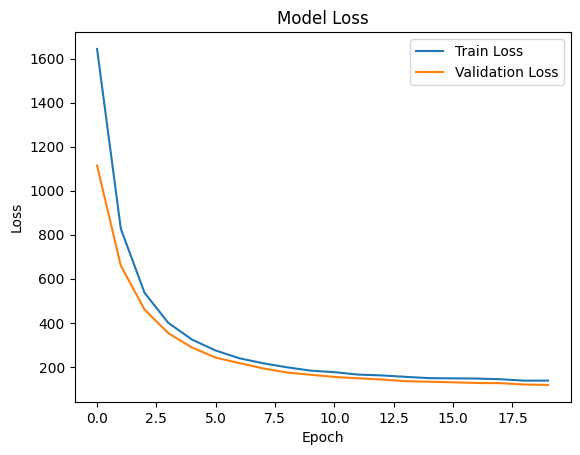

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 134.6199
Test Loss: 117.87982940673828
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


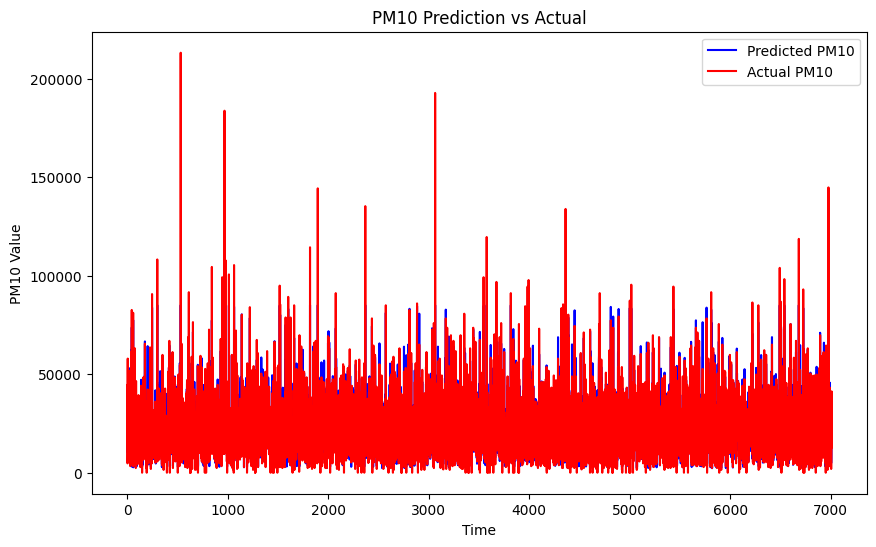

RMSE: 5157.193973911098


In [ ]:
# 모델 평가
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# 예측
predictions = model.predict(X_test)

# 스케일링 복원
predictions_rescaled = scaler.inverse_transform(predictions)

# Reshape y_test to a 2D array before inverse transforming
y_test_reshaped = y_test.reshape(-1, 1)
y_test_rescaled = scaler.inverse_transform(y_test_reshaped)

# 예측 vs 실제 값 시각화 (선택 사항)
plt.figure(figsize=(10, 6))
plt.plot(predictions_rescaled, label='Predicted PM10', color='blue')
plt.plot(y_test_rescaled, label='Actual PM10', color='red')
plt.title('PM10 Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('PM10 Value')
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))
print(f'RMSE: {rmse}')